# German Speed Limit Sign Recognition with Tensorflow and Keras

## Take this as a starting point
## Work in this notebook and add workshop steps here

In [1]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import warnings
warnings.filterwarnings('ignore')

## Local Installation requires libs Scikit Learn, TensorFlow, and Keras to be installed already

In [3]:
import sklearn
# should at least be 0.18
sklearn.__version__

'0.18'

In [4]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
# should at least be 1.0
tf.__version__

'1.0.0'

In [5]:
import keras as keras
# should at least be 1.2 and use TensorFlow backend
keras.__version__

Using TensorFlow backend.


'1.2.2'

## Analyse and Prepare Image Data

In [6]:
import os
import skimage.data

def load_data(data_dir):
    """Loads a data set and returns two lists:
    
    images: a list of Numpy arrays, each representing an image.
    labels: a list of numbers that represent the images labels.
    """
    # Get all subdirectories of data_dir. Each represents a label.
    directories = [d for d in os.listdir(data_dir) 
                   if os.path.isdir(os.path.join(data_dir, d))]
    # Loop through the label directories and collect the data in
    # two lists, labels and images.
    labels = []
    images = []
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f) 
                      for f in os.listdir(label_dir) if f.endswith(".ppm")]
        # For each label, load it's images and add them to the images list.
        # And add the label number (i.e. directory name) to the labels list.
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(int(d))
    return images, labels

In [7]:
# Load datasets.
ROOT_PATH = "../data"
data_dir = os.path.join(ROOT_PATH, "speed-limit-signs")

images, labels = load_data(data_dir)

In [8]:
len(set(labels)), len(images)

(6, 379)

In [9]:
import matplotlib
import matplotlib.pyplot as plt

def display_images_and_labels(images, labels):
    """Display the first image of each label."""
    unique_labels = set(labels)
    plt.figure(figsize=(15, 15))
    i = 1
    for label in unique_labels:
        # Pick the first image for each label.
        image = images[labels.index(label)]
        plt.subplot(8, 8, i)  # A grid of 8 rows x 8 columns
        plt.axis('off')
        plt.title("Label {0} ({1})".format(label, labels.count(label)))
        i += 1
        _ = plt.imshow(image)
    plt.show()

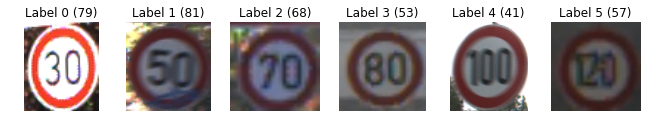

In [10]:
display_images_and_labels(images, labels)

In [11]:
for image in images[:5]:
    print("shape: {0}, min: {1}, max: {2}".format(image.shape, image.min(), image.max()))

shape: (61, 51, 3), min: 0, max: 255
shape: (55, 56, 3), min: 0, max: 255
shape: (80, 77, 3), min: 0, max: 255
shape: (41, 40, 3), min: 34, max: 255
shape: (32, 32, 3), min: 8, max: 255


In [12]:
import skimage.transform

# Resize images
images64 = [skimage.transform.resize(image, (64, 64))
                for image in images]

In [13]:
for image in images64[:5]:
    print("shape: {0}, min: {1}, max: {2}".format(image.shape, image.min(), image.max()))

shape: (64, 64, 3), min: 0.02521110983455652, max: 1.0
shape: (64, 64, 3), min: 0.0004308363970586949, max: 1.0
shape: (64, 64, 3), min: 0.01146216299019458, max: 1.0
shape: (64, 64, 3), min: 0.1364985447303927, max: 1.0
shape: (64, 64, 3), min: 0.05343137254901969, max: 1.0


In [14]:
y = np.array(labels)
X = np.array(images64)
y.shape, X.shape

((379,), (379, 64, 64, 3))